In [192]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.16.2'

In [193]:
np.random.rand()

0.5204828212332951

In [182]:
class Bandit:
    def __init__(self, m):
        self.m = m           # bandit mean reward
        self.N = 0           # number of plays
        self.mean = 0        # calculated mean 
        return None
    def pull(self):
        return np.random.randn()+self.m
    def update(self, x):
        self.N +=1
        self.mean = (1-1.0/self.N)*self.mean+(1.0/self.N)*x

In [183]:
def run_experiment_eps(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in range(N):
        p = np.random.rand()
        if p<eps:
            selection = np.random.choice(3)
            #print("EXPLOIT - arm {}".format(selection))
        else:
            selection = np.argmax([b.mean for b in bandits])
            #print("EXPLORE - arm {}".format(selection))
        
        value = bandits[selection].pull()
        bandits[selection].update(value)
        data[i] = value
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
    return cumulative_average

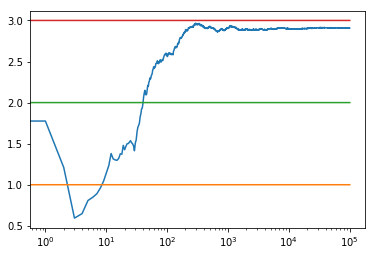

1.0042509666139536
2.0193548274675974
3.007881601452841


array([2.12803319, 1.775136  , 1.20998227, ..., 2.90726123, 2.90727699,
       2.90727007])

In [184]:
run_experiment_eps(1.0, 2.0, 3.0, 0.10, 100000)

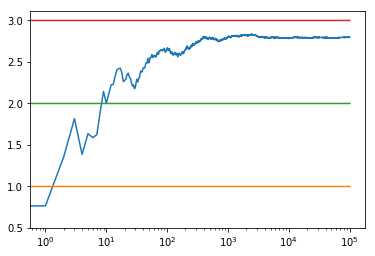

0.9982099908018006
2.008756102522086
3.0003998608948548


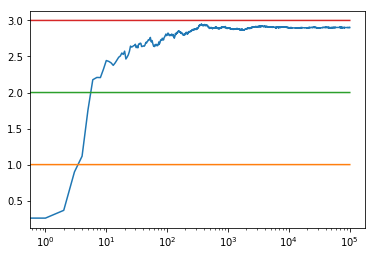

0.9987854117087688
1.987656599253621
3.0023696100135027


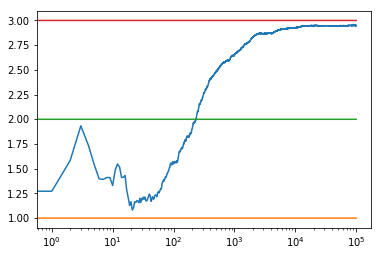

0.9887937511868906
1.9989499304949236
3.0024135551357585


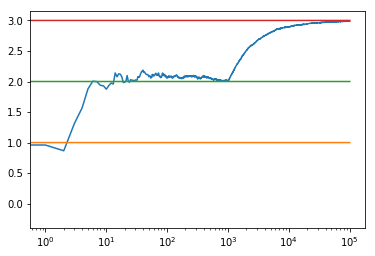

0.9727036005078312
2.0001571693760645
3.007114628889334


In [185]:
c_2 = run_experiment_eps(1.0, 2.0, 3.0, 0.2, 100000)
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment_eps(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment_eps(1.0, 2.0, 3.0, 0.01, 100000)

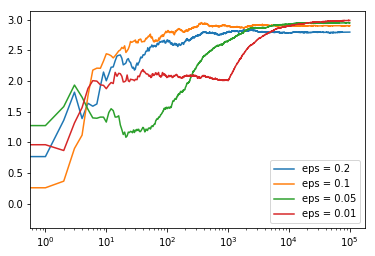

In [186]:
# log scale plot
plt.plot(c_2, label='eps = 0.2')
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

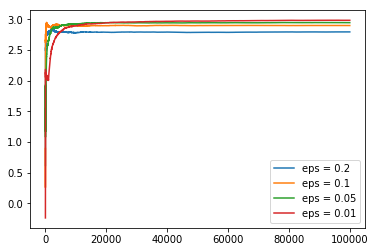

In [187]:
# linear plot
plt.plot(figsize=(20,1))
plt.plot(c_2, label='eps = 0.2')
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('linear')
plt.show()

## Optimistic Initial Value

In [188]:
class BanditOptim:
    def __init__(self, m, upper_limit):
        self.m = m                 # bandit mean reward
        self.N = 0                 # number of plays
        self.mean = upper_limit    # calculated mean 
        return None
    def pull(self):
        return np.random.randn()+self.m
    def update(self, x):
        self.N +=1
        self.mean = (1-1.0/self.N)*self.mean+(1.0/self.N)*x

In [189]:
def run_experiment(m1, m2, m3, N, upper_limit=10):
    bandits = [BanditOptim(m1, upper_limit), BanditOptim(m2, upper_limit), BanditOptim(m3, upper_limit)]
    data = np.empty(N)
    for i in range(N):
        selection = np.argmax([b.mean for b in bandits])        
        value = bandits[selection].pull()
        bandits[selection].update(value)
        data[i] = value
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.mean)
    return cumulative_average

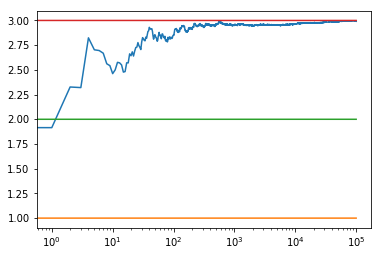

2.208648295572031
1.6221150997340386
2.992302213433587


array([2.2086483 , 1.9153817 , 2.32661554, ..., 2.99228596, 2.9922765 ,
       2.99228068])

In [190]:
run_experiment(1.0, 2.0, 3.0, 100000)


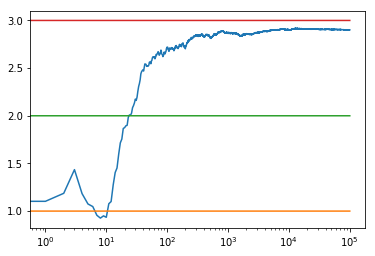

1.017005564695973
2.008913017027736
3.0017302641903756


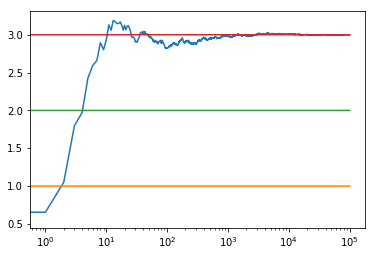

0.5772012658918902
0.732795391507618
2.997557086742913


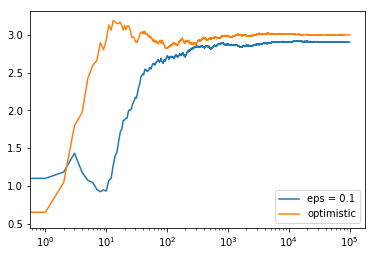

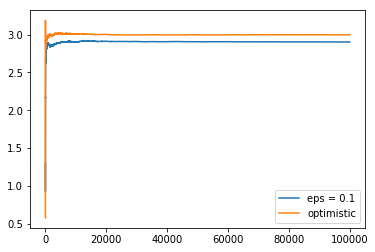

In [191]:
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
oiv = run_experiment(1.0, 2.0, 3.0, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.xscale('log')
plt.show()


# linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.show()